# Problem Set 3, due May 9th at 3:30pm.

### Before You Start

Make sure the following libraries load correctly (hit Ctrl-Enter). Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python!

*Also note:* For this assignment we are requiring you to use base **matplotlib** - no more Seaborn or other packages. This will help you become familiar with techniques for maintaining fine-grained control over your data visualizations. It will also help our graders, who spent countless hours trying to make various versions import for grading.

In [308]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import timeit

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).  Please read about the dataset carefully before continuing.  Use the following commands to load the dataset and print some descriptive information


In [309]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [310]:
print (bdata.keys())
print (bdata.feature_names)
print (bdata.data.shape)
print (bdata.target.shape)
# uncomment the following if you want to see a lengthy description of the dataset
#print (bdata.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)


In [311]:
#Convert the data set into a dataframe
bdata_df = pd.DataFrame(bdata.data,columns=bdata.feature_names)
bdata_df['TARGET'] = bdata.target

---

## Part 1: Descriptive analysis

The goal of this section is to explore the data and make a few nice
visualizations -- before beginning the "real" work, we should dig into
the data a bit do see what we are dealing with.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.
  

### 1.1: Histogram of housing prices

Your first task is to make a histogram of 'MEDV' (the median hose
                                                  value, your target
                                                  variable), and make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


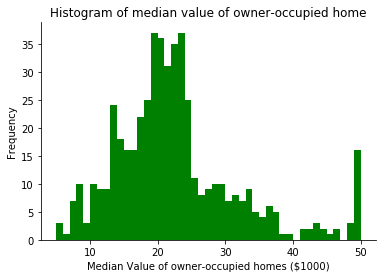

In [312]:
#For binwidth =1000, bin = (max() - min()/bindiwdth)
fig,ax = plt.subplots()
ax.hist(bdata_df.TARGET, color= 'g', bins = 45) 
ax.set_xlabel('Median Value of owner-occupied homes ($1000)')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of median value of owner-occupied home')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

### 1.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship
between the median value of the home (y-axis) and the per-capita crime
rate (x-axis).  Properly label your axes, and make sure that your
graphic looks polished and professional.  


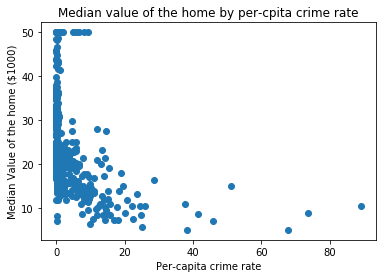

In [313]:
plt.scatter(y=bdata_df.TARGET,x=bdata_df.CRIM)
plt.xlabel('Per-capita crime rate')
plt.ylabel('Median Value of the home ($1000)')
plt.title('Median value of the home by per-cpita crime rate')
plt.show()

### 1.3 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  

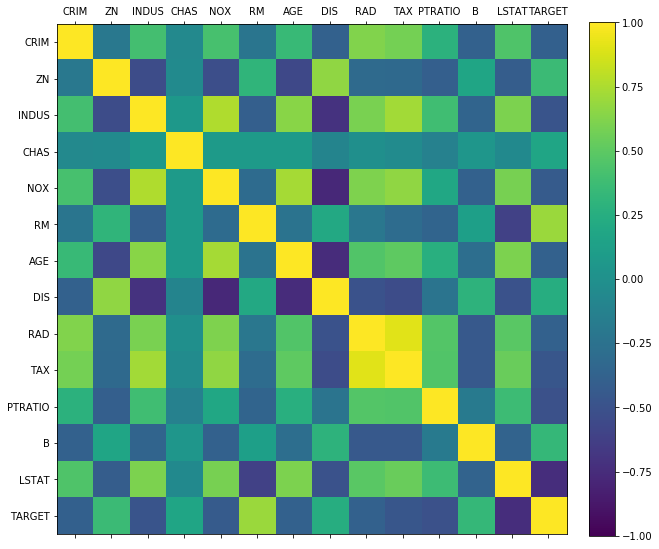

In [420]:
feat = ['CRIM','B','RM','DIST','LSTAT','NOX','PTRATIO','TARGET','ZN','RAD']
corr  = bdata_df.corr()
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
cax = ax.matshow(corr,vmin=-1,vmax=1)
fig.colorbar(cax,fraction=0.046,pad=0.04)
ticks=np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr)
ax.set_yticklabels(corr)
plt.show()

---

## Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

### 2.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. 
Details of RMSE can be found in Hastie, Tibishrani, Friedman _The
Elements of Statistical Learning_, Ch 2.5.  (Available on the web)



In [314]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print compute_rmse((2,2,3),(0,2,6)
2.08
"""
# Provide two arrays
pred = np.array([2,2,3])
obs = np.array([0,2,6])

def compute_rmse(pred,obs):
    pred = np.array(pred)
    obs = np.array(obs)
    return np.sqrt(np.mean((pred-obs)**2))

compute_rmse(pred,obs)

2.0816659994661326

### 2.2 Divide your data into training and testing datasets


Randomly select 66% of the data and put this in a training dataset
(call this "bdata_train"), and place the remaining 34% in a testing
dataset (call this "bdata_test").  Please us 'np.random' for random numbers.


In [316]:
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=13579)
#66% of total number of records in df = 333 (floor)
#index=np.random.permutation(bdata_df.shape[0])
#train_index,test_index = index[:333],index[333:]
#bdata_train = bdata_df.ix[train_index,:].reset_index()
#bdata_test = bdata_df.ix[test_index,:].reset_index()
index = np.random.choice(len(bdata.data), round(bdata.data.shape[0]*0.66), replace=False)
bdata_train = bdata_df.iloc[index,:]
bdata_test = bdata_df.iloc[~(bdata_df.index.isin(index)),:]

### 2.3 Use a trivial baseline model for prediction, and compute RMSE
Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training set.  Now compute the RMSE on the test data set (but use the model you trained on the training set!).  How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?

In [317]:
mean_train_value = bdata_train['TARGET'].mean()
#mean_train_value
mean_train_array = np.repeat(mean_train_value,len(bdata_train))
rmse_train = compute_rmse(mean_train_array,bdata_train['TARGET'])
print('The RMSE value for training data set:',rmse_train)
#mean_test_value
rmse_test = compute_rmse(mean_train_array[:len(bdata_test)],bdata_test['TARGET'])
print('The RMSE value for test data set:',rmse_test)

The RMSE value for training data set: 8.57443441541
The RMSE value for test data set: 10.3092622563


RMSE values for training data set is lower as compared to test data set. This means that the model is trying to overfit the data.

##Part 3: Nearest Neighbors


### 3.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average
Value" baseline that you computed above.  Soon you will implement the
Nearest Neighbor algorithm, but first you need to create a distance
metric to measure the distance (and similarity) between two instances.
Write a generic function to compute the Lp-Norm distance. Verify that
your function works by computing the L-2 (Euclidean) distance and L-1 (Manhattan) distance between the points (3,4) and (6,8), and between (6,8) and (3,4).  Ensure that your distance is correct and positive in both cases!


In [318]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print distance((3,4),(5,9),1)
7

"""
# choice 1 is Manhattan distance, choice 2 is Euclidean distance
def lp_dist(x1,x2,choice):
    if choice == 1:
        return abs(sum(x1-x2))
    if choice == 2:
        return np.sqrt(sum((x1-x2)**2))

x1 = np.array([3,4])
x2 = np.array([5,9])
lp_dist(x1,x2,2)

5.3851648071345037

### 3.2 Basic Nearest Neighbor algorithm

Now things get fun.  Your task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as
you know, with Nearest Neighbors there is no real training, you just
need to keep your training data in memory.  Write a function that
predicts, for each instance in the testing data (bdata_test), the
median home value using the nearest neighbor algorithm we discussed in
class.  Since this is a small dataset, you can simply compare your
test instance to every instance in the training set, and return the
MEDV value of the closest training instance.  You can just loop over
the instances to find the nearest neighbor.  Have your function take L as an input, where L is passed to the distance function.

Compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance.  Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.

Plot the true vs predicted price for your test data


In [319]:
test_matrix = bdata_test.as_matrix(('CRIM','RM','TARGET'))
train_matrix = bdata_train.as_matrix(('CRIM','RM','TARGET'))

In [368]:
def nearest_neighbor(test_matrix,train_matrix,choice): 
    row_num, col_num = train_matrix.shape
    pred = []
    for i in range(len(test_matrix)):
        dist=[]
        for j in range(len(train_matrix)):
            dist.append((j,lp_dist(test_matrix[i],train_matrix[j,:col_num-1],choice)))
        dist = sorted(dist, key=lambda x: x[1])
        #below lines added for k neighbors
        #top_k_nearest = dist[:k]
        #index = [top_k_nearest[j][0] for j in range(k)]
        index=dist[0][0]
        #end of k neighbors changes
        pred.append(train_matrix[index,col_num-1])
    return pred  
        #pred6 = train_matrix[index,col_num-1]
    #return np.mean(pred6)

In [369]:
pred = nearest_neighbor(test_matrix[:,:2],train_matrix[:,:],2)

In [370]:
start_time = timeit.default_timer()
print ("RMSE:",compute_rmse(pred,test_matrix[:,2]))
elapsed = timeit.default_timer() - start_time
print ('Total time of execution (in seconds) : {0}'.format(elapsed))

RMSE: 7.40172041598
Total time of execution (in seconds) : 0.000786846660048468


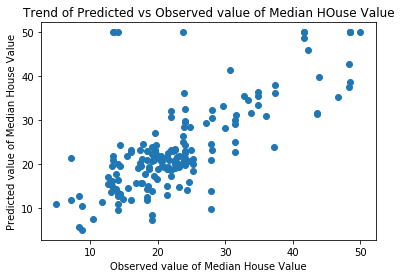

In [324]:
plt.scatter(x=pred,y=test_matrix[:,2])
plt.xlabel('Observed value of Median House Value')
plt.ylabel('Predicted value of Median House Value')
plt.title('Trend of Predicted vs Observed value of Median HOuse Value')
plt.show()

### 3.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Normalization is similar to Mahalanobis disctance (if the features are independent).  Read more in Daume (2017), _A Course in Machine Learning_ Chapter 4.3.  Write a simple generic normalization function that takes as input an array of values for a given feature, and returns the normalized array.  Do it well, you will need it in the future as well ;-)

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations.

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

In [325]:
"""
# write your function specification here!
"""
def norm(x):
    row_num, col_num =  x.shape
    for i in range(col_num - 1):
        mean = np.mean(x[:,i])
        std = np.std(x[:,i])
        x[:,i] = (x[:,i]-mean)/std
    return x

In [326]:
norm_train_matrix = bdata_train.as_matrix(columns=('CRIM','RM','TARGET'))
norm_test_matrix = bdata_test.as_matrix(columns=('CRIM','RM','TARGET'))
norm_train_data = norm(norm_train_matrix)
norm_test_data = norm(norm_test_matrix)

In [327]:
#Call the nearest neighbor function to calculate the predicted value
norm_pred = nearest_neighbor(norm_test_data[:,:2],norm_train_data[:,:],2)

In [328]:
compute_rmse(norm_pred,norm_test_data[:,2])

7.6927555773008294

The RMSE value found in this is greater than the RMSE value found in the previous model. This should generally not happen as normalization reduces the RMSE.

### 3.4 Optimization


A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!  

What combination of features and distance function provide the lowest RMSE?  Compre RMSEs with the corresponding true-predicted plots.

Do your decisions affect the running time of the algorithm?

In [329]:
'''
6 - AGE      proportion of owner-occupied units built prior to 1940
11 - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
9 - TAX      full-value property-tax rate per $10,000
3 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5 - NOX      nitric oxides concentration (parts per 10 million)
'''
#With 4 variables
new_test_matrix = bdata_test.as_matrix(columns=('CRIM','B','RM','DIS','TARGET'))
new_train_matrix = bdata_train.as_matrix(columns=('CRIM','B','RM','DIS','TARGET'))
new_norm_test_matrix = norm(new_test_matrix)
new_norm_train_matrix = norm(new_train_matrix)
pred1 = nearest_neighbor(new_norm_test_matrix[:,:4],new_norm_train_matrix[:,:],2)
start_time1 = timeit.default_timer()
print ("RMSE:",compute_rmse(pred1,new_test_matrix[:,4]))
elapsed1 = timeit.default_timer() - start_time1
print ('Total time of execution (in seconds) : {0}'.format(elapsed1))

RMSE: 6.91123958188
Total time of execution (in seconds) : 0.0005212859105085954


In [330]:
#With other 2 variables
new1_test_matrix = bdata_test.as_matrix(columns=('B','LSTAT','TARGET'))
new1_train_matrix = bdata_train.as_matrix(columns=('B','LSTAT','TARGET'))
new1_norm_test_matrix = norm(new1_test_matrix)
new1_norm_train_matrix = norm(new1_train_matrix)

pred2 = nearest_neighbor(new1_norm_test_matrix[:,:2],new1_norm_train_matrix[:,:],2)

start_time2 = timeit.default_timer()
print ("RMSE:",compute_rmse(pred2,new1_test_matrix[:,2]))
elapsed2 = timeit.default_timer() - start_time2
print ('Total time of execution (in seconds) : {0}'.format(elapsed2))

RMSE: 7.36511655444
Total time of execution (in seconds) : 0.0004892133583780378


From the various models executed, it was found that the least RMSE is for the combination of CRIM and RM. Other models when implemented give a higher RMSE. Also, addition of features can increase or decrease the RMSE of the model. 

### 3.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  To prevent this sort of overfitting, you need to use cross-validation (see Daume (2017) _A Course in Machine Learning_, Ch 4.6).  Here you must implement a simple k-fold cross-validation algorithm yourself.  Essentially you have to partition your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in K-fold iterator -- do *not* use that here.)

Use Euclidean distance with CRIM and RM (0 and 5) as features.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations, and the total running time for all 10 iterations.  Compare the k-fold RMSE with the training-testing split RMSE above for the same hyperparameter values.

In [424]:
def k_cross_validation(data,features,fold,k,choice):
    
    #Set the features
    features = features + ['TARGET']
    tot_data = bdata_df[features]
    len_features = len(features)
    
    #Initialize the index variables
    tot_index = list(tot_data.index)
    #np.random.seed(13575)
    np.random.shuffle(tot_index)
    rem = []
    partition = int(len(tot_index)/fold)
    remainder = []
    rmse_list = []
    
    #Setting the indexes for the K fold cross validation
    for i in range(1,fold+1):
        #set the test index for each partition
        test = tot_index[(i-1)*partition:i*partition]
        #select the data based on the above test index and normalize the data
        test_data = norm(tot_data.iloc[test].as_matrix())
        #the remainder stores the test indexes already used
        remainder = remainder + test
        #rem will store the current value which is present in remainder but not in test
        rem = set(remainder) ^ set(test)
        #train will be the total minus the current test indices
        train = list(rem) + tot_index[i*partition:]
        #select the train data on the above train index and normalize the data
        train_data = norm(tot_data.iloc[train].as_matrix())
        print('Iteration number:',i,'Test index start:', (i-1)*partition)
        
        #Call the nearest neighbor function
        if k == 1:
            pred3 = nearest_neighbor(test_data[:,:len_features-1],train_data[:,:],choice)
        else:
            pred3 = k_nearest_neighbor(test_data[:,:len_features-1],train_data[:,:],k,choice)
        #   print(pred3)
        #calculate the rmse value
        rmse_value = compute_rmse(pred3,test_data[:,len_features-1])
        rmse_list.append(rmse_value)
        print('RMSE:',rmse_value)
    average = np.mean(rmse_list)    
    print('Avg RMSE:',average)
    return average

In [425]:
#Explicitly mention all the features except the target feature
#Format - data,features, number of folds, K, choice to select the distance (1: Manhattan, 2:Euclidean)
start_time = timeit.default_timer()
rmse_list_values = k_cross_validation(tot_data,['CRIM','RM'],10,1,2)
elapsed = timeit.default_timer() - start_time
print ('Total time of execution (in seconds) : {0}'.format(elapsed))

Iteration number: 1 Test index start: 0
RMSE: 7.85816772537
Iteration number: 2 Test index start: 50
RMSE: 7.65427984856
Iteration number: 3 Test index start: 100
RMSE: 7.81739086908
Iteration number: 4 Test index start: 150
RMSE: 8.17919311424
Iteration number: 5 Test index start: 200
RMSE: 7.52712428488
Iteration number: 6 Test index start: 250
RMSE: 5.4198339458
Iteration number: 7 Test index start: 300
RMSE: 6.59613523209
Iteration number: 8 Test index start: 350
RMSE: 8.36428120044
Iteration number: 9 Test index start: 400
RMSE: 7.44502518465
Iteration number: 10 Test index start: 450
RMSE: 7.15238421787
Avg RMSE: 7.4013815623
Total time of execution (in seconds) : 4.361343078828213


The average RMSE value for the cross-validation is slightly lower as compared to the one performed in 3.4. This is good as cross-validation should decrease the RMSE.

### 3.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

In [426]:
def k_nearest_neighbor(test_matrix,train_matrix,k,choice):
    row_num, col_num = train_matrix.shape
    pred = []
    for i in range(len(test_matrix)):
        dist=[]
        for j in range(len(train_matrix)):
            dist.append((j,lp_dist(test_matrix[i],train_matrix[j,:col_num-1],choice)))
        dist = sorted(dist, key=lambda x: x[1])
        top_k_nearest = dist[:k]
        index = [top_k_nearest[j][0] for j in range(k)]
        pred6 = train_matrix[index,col_num-1]    
    return np.mean(pred6)

In [427]:
#Explicitly mention all the features except the target feature
#Format - data,features, number of folds, K, choice to select the distance (1: Manhattan, 2:Euclidean)
rmse_list_values = k_cross_validation(tot_data,['CRIM','RM'],10,3,2)

Iteration number: 1 Test index start: 0
RMSE: 9.31692247711
Iteration number: 2 Test index start: 50
RMSE: 11.2734752603
Iteration number: 3 Test index start: 100
RMSE: 10.8025089678
Iteration number: 4 Test index start: 150
RMSE: 10.8253498789
Iteration number: 5 Test index start: 200
RMSE: 13.4287452876
Iteration number: 6 Test index start: 250
RMSE: 11.0175637557
Iteration number: 7 Test index start: 300
RMSE: 16.7659211233
Iteration number: 8 Test index start: 350
RMSE: 11.1068897537
Iteration number: 9 Test index start: 400
RMSE: 8.87686756563
Iteration number: 10 Test index start: 450
RMSE: 19.2610280099
Avg RMSE: 12.267527208


### 3.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

In [429]:
'''
CRIM - 0
ZN - 1
RM - 5
AGE - 6
DIS - 7
TAX - 9
'''
rmse_array_307 = []
for i in range(1,26):
    print(i,"Nearest Neighbor")
    new_rmse = k_cross_validation(tot_data,['CRIM','RM','ZN','AGE','DIS','TAX'],10,i,2)
    print("NEw RMSE",new_rmse)
    rmse_array_307.append(new_rmse)

1 Nearest Neighbor
Iteration number: 1 Test index start: 0
RMSE: 7.58544659199
Iteration number: 2 Test index start: 50
RMSE: 6.48680198557
Iteration number: 3 Test index start: 100
RMSE: 6.83071006558
Iteration number: 4 Test index start: 150
RMSE: 5.61859413021
Iteration number: 5 Test index start: 200
RMSE: 7.90632658066
Iteration number: 6 Test index start: 250
RMSE: 7.72793633514
Iteration number: 7 Test index start: 300
RMSE: 4.95796329151
Iteration number: 8 Test index start: 350
RMSE: 9.19540102443
Iteration number: 9 Test index start: 400
RMSE: 8.62175156218
Iteration number: 10 Test index start: 450
RMSE: 6.03595891305
Avg RMSE: 7.09668904803
NEw RMSE 7.09668904803
2 Nearest Neighbor
Iteration number: 1 Test index start: 0
RMSE: 15.7295772353
Iteration number: 2 Test index start: 50
RMSE: 7.32683424134
Iteration number: 3 Test index start: 100
RMSE: 17.9205161756
Iteration number: 4 Test index start: 150
RMSE: 9.79069456167
Iteration number: 5 Test index start: 200
RMSE: 8.70

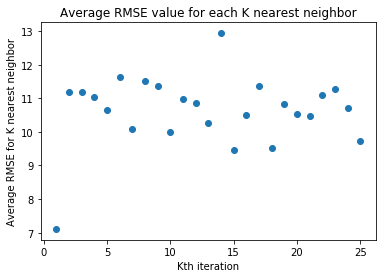

In [435]:
plt.scatter(range(1,26),rmse_array_307)
plt.ylabel('Average RMSE for K nearest neighbor')
plt.xlabel('Kth iteration')
plt.title('Average RMSE value for each K nearest neighbor')
plt.show()

From the average values of the 25-fold cross validation, it can be observed that as the number of nearest neighbors increases, the average RMSE is increasing. It is least for K = 1 and hence is the reasonable choice.

### Extra-Credit: Forward selection

Thus far the choice of predictor variables has been rather arbitrary. For extra credit, implement a basic [forward selection](http://www.stat.ubc.ca/~rollin/teach/643w04/lec/node41.html) algorithm to progressively include features that decrease the cross-validated RMSE of the model. Note that the optimal value of K may be different for each model, so you may want to use cross-validation to choose K each time (but it is also fine if you fix K at the optimal value from 2.7).  Create a graph that shows RMSE as a function of the number of features in the model. Label each point on the x-axis with the name of the feature that is added at that step in the forward selection algorithm. *(For instance, if the optimal single-feature model has CRIM with RMSE = 10, and the optimal two-feature model has CRIM+ZN with RMSE=9, the first x-axis label will say CRIM and the second x-axis lable with say ZN)*